In [515]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [516]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [517]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [518]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [519]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [520]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [521]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


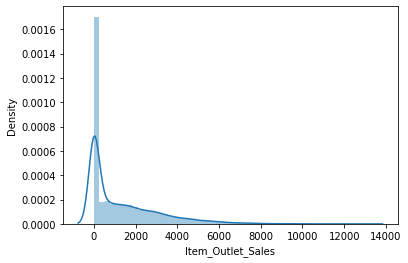

In [522]:
sns.distplot(data['Item_Outlet_Sales'])

In [523]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [524]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [525]:
data.shape

(14204, 13)

In [526]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

<ipython-input-526-fdb6849c7bdc>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorial_features = data.select_dtypes(include=[np.object])


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [527]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [528]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [529]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [530]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [531]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548


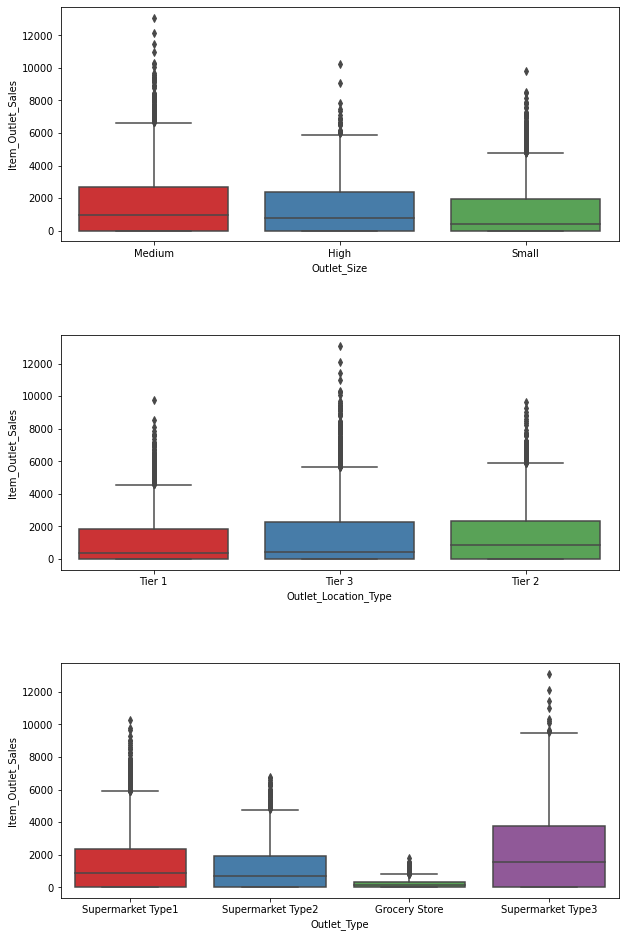

In [532]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

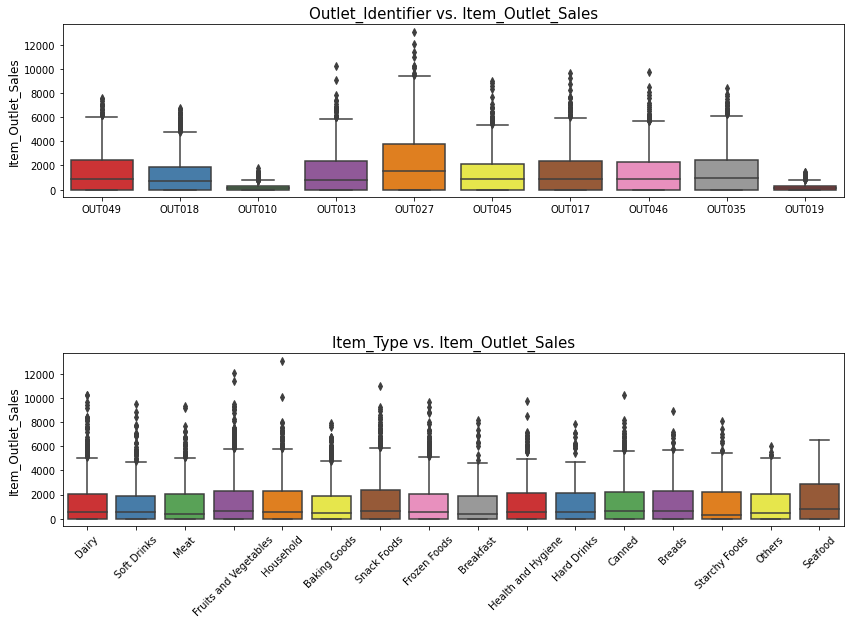

In [533]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [534]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values_pt = sum(item_avg_weight ['Item_Weight'].isnull())
print(missing_values_pt)

missing_values = data['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])


0
Missing values: 2439


In [535]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
missing_values = data['Outlet_Size'].isnull() 
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(data['Outlet_Size'].isnull()))

0


In [536]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)


data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [537]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [538]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'Low Fat':'lf',
                                                             'Regular':'reg',
                                                             'low fat':'lf'})
print(data['Item_Fat_Content'].value_counts())

lf     8663
reg    5019
LF      522
Name: Item_Fat_Content, dtype: int64


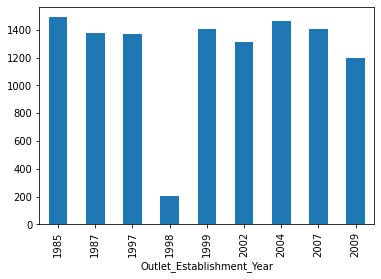

In [539]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [540]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [541]:
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,lf,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,10
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,0
2,FDN15,17.50,lf,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,10


In [542]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    434
Item_Fat_Content                 3
Item_Visibility              13688
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
Item_Type_Combined               3
Outlet_Years                     9
dtype: int64

In [543]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_cols = ['Outlet_Identifier']
onehot_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
              
le = LabelEncoder()
for i in label_cols:
    data[i] = le.fit_transform(data[i])
data = pd.get_dummies(data, columns=onehot_cols)

In [544]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Item_Type_Combined_DR,Item_Type_Combined_FD,Item_Type_Combined_NC,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,9,1999,3735.1380,train,10,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,3,2009,443.4228,train,0,...,1,0,0,1,0,0,0,0,1,0


In [545]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type', "Item_Identifier",'Outlet_Establishment_Year'],axis=1,inplace=True)

numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
scaler_target = MinMaxScaler()
data["Item_Outlet_Sales"] = scaler_target.fit_transform(data["Item_Outlet_Sales"].values.reshape(-1, 1))

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [546]:
data.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Identifier                  int64
Item_Outlet_Sales                float64
source                            object
Outlet_Years                       int64
Item_Fat_Content_LF                uint8
Item_Fat_Content_lf                uint8
Item_Fat_Content_reg               uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Size_nan                    uint8
Item_Type_Combined_DR              uint8
Item_Type_Combined_FD              uint8
Item_Type_Combined_NC              uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [547]:
data.apply(lambda x : len(x.unique()))

Item_Weight                        434
Item_Visibility                  13688
Item_MRP                          8052
Outlet_Identifier                   10
Item_Outlet_Sales                 3494
source                               2
Outlet_Years                         9
Item_Fat_Content_LF                  2
Item_Fat_Content_lf                  2
Item_Fat_Content_reg                 2
Outlet_Location_Type_Tier 1          2
Outlet_Location_Type_Tier 2          2
Outlet_Location_Type_Tier 3          2
Outlet_Size_High                     2
Outlet_Size_Medium                   2
Outlet_Size_Small                    2
Outlet_Size_nan                      2
Item_Type_Combined_DR                2
Item_Type_Combined_FD                2
Item_Type_Combined_NC                2
Outlet_Type_Grocery Store            2
Outlet_Type_Supermarket Type1        2
Outlet_Type_Supermarket Type2        2
Outlet_Type_Supermarket Type3        2
dtype: int64

In [548]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_LF,Item_Fat_Content_lf,Item_Fat_Content_reg,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Item_Type_Combined_DR,Item_Type_Combined_FD,Item_Type_Combined_NC,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.038399,0.927507,9,0.285409,train,10,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0.081274,0.048346,0.072068,3,0.033883,train,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,0.770765,0.040593,0.468288,9,0.160256,train,10,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0.871986,0.043901,0.640093,0,0.055963,train,11,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.260494,0.019104,0.095805,1,0.076007,train,22,0,1,0,...,0,0,0,0,0,1,0,1,0,0


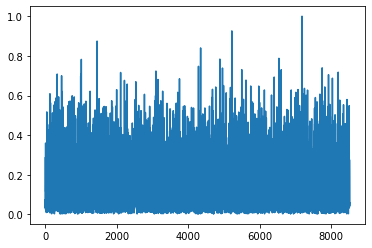

In [549]:
import matplotlib.pyplot as plt
train["Item_Outlet_Sales"].plot()

In [550]:
train.apply(lambda x: sum(x.isnull()))

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Identifier                0
Item_Outlet_Sales                0
Outlet_Years                     0
Item_Fat_Content_LF              0
Item_Fat_Content_lf              0
Item_Fat_Content_reg             0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Size_nan                  0
Item_Type_Combined_DR            0
Item_Type_Combined_FD            0
Item_Type_Combined_NC            0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
dtype: int64

In [551]:
df_train = train
y = df_train["Item_Outlet_Sales"]
df_train.drop(['Item_Outlet_Sales'],axis=1,inplace=True)
X = df_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [552]:



from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
import xgboost as xgb



# Define the hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.05],
    'max_depth': [5],
    'n_estimators': [250],
    'min_child_weight': [3]
}

# Create an XGBoost regressor model
regressor = xgb.XGBRegressor()

# Use grid search with cross-validation to tune the hyperparameters
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score (negative mean squared error): ", grid_search.best_score_)

# Train the final model with the best hyperparameters
final_regressor = xgb.XGBRegressor(learning_rate=0.05,
                                   max_depth=5,
                                   n_estimators=250,
                                   min_child_weight=3,
                                   objective='reg:squarederror',
                                   booster='gbtree',
                                   tree_method='auto',
                                   nthread=None,
                                   gamma=0,
                                   max_delta_step=0,
                                   colsample_bylevel=1,
                                   colsample_bynode=1,
                                   reg_alpha=0,
                                   reg_lambda=1,
                                   scale_pos_weight=1,
                                   base_score=0.5,
                                   random_state=0)

final_regressor.fit(X, y)


[20:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 250}
Best score (negative mean squared error):  -0.007102523748709316


XGBRegressor(learning_rate=0.05, max_depth=5, min_child_weight=3,
             n_estimators=250, objective='reg:squarederror',
             tree_method='auto')

In [553]:
from sklearn import metrics
train_accuracy = final_regressor.score(X, y)



In [554]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RF.fit(X,y)
train_accuracy = final_regressor.score(X, y)


In [555]:
from sklearn.model_selection  import cross_val_score
def cross_val(model_name,model,X,y,cv):    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.57
0.53
0.53
0.56
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


In [557]:
y_pred = RF.predict(test)
y_pred_original = scaler_target.inverse_transform(np.array(y_pred).reshape(-1, 1))
y_pred_original[0, :]

array([[1582.87284109],
       [1435.58574315],
       [ 574.36902957],
       ...,
       [1981.93037885],
       [3643.53222476],
       [1332.89731596]])

In [569]:
test1 = pd.read_csv('Test.csv')
submission = pd.DataFrame({
'Item_Identifier':test1['Item_Identifier'],
'Outlet_Identifier':test1['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred_original[:, 0]
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

submission.to_csv('submission.csv', sep = ";",index=False)